In [294]:
include("sim.jl")

simulate_pomdp (generic function with 1 method)

In [295]:
@time roadway, policy, scenes, headings = simulate_pomdp()

"finish line" = "finish line"
r = 144443.3726101692
  3.692186 seconds (17.89 M allocations: 2.101 GiB, 28.90% gc time)


(Roadway, DPWPlanner{laneChangeMDP,Frame{Entity{VehicleState,VehicleDef,Int64}},Int64,MCTS.SolvedRolloutEstimator{RandomPolicy{MersenneTwister,laneChangeMDP,BeliefUpdaters.NothingUpdater},MersenneTwister},RandomActionGenerator{MersenneTwister},MersenneTwister}(DPWSolver(20, 5.0, 500, Inf, 10.0, 0.5, 4.0, 0.125, false, true, true, true, false, MersenneTwister(UInt32[0x7e200613, 0x238b6ea5, 0x3a456229, 0x69183964], Random.DSFMT.DSFMT_state(Int32[-1704066587, 1073167440, -1124683986, 1073246984, -1000941712, 1073206557, 1141953420, 1073455952, -388028183, 1073432350  …  -1685416608, 1072938850, 1174539575, 1073250797, -543125928, -15037910, -1625331022, -591340066, 382, 0]), [1.2063434559940736, 1.5168314016945008, 1.892939075107825, 1.6346511332972362, 1.8019384295638394, 1.7910731243119564, 1.6038318166103098, 1.3115189876072362, 1.4424793319902591, 1.5062455211469015  …  1.0911780394784745, 1.1883749533828847, 1.1398075892865371, 1.783314562454558, 1.2123194372717674, 1.151115362880242

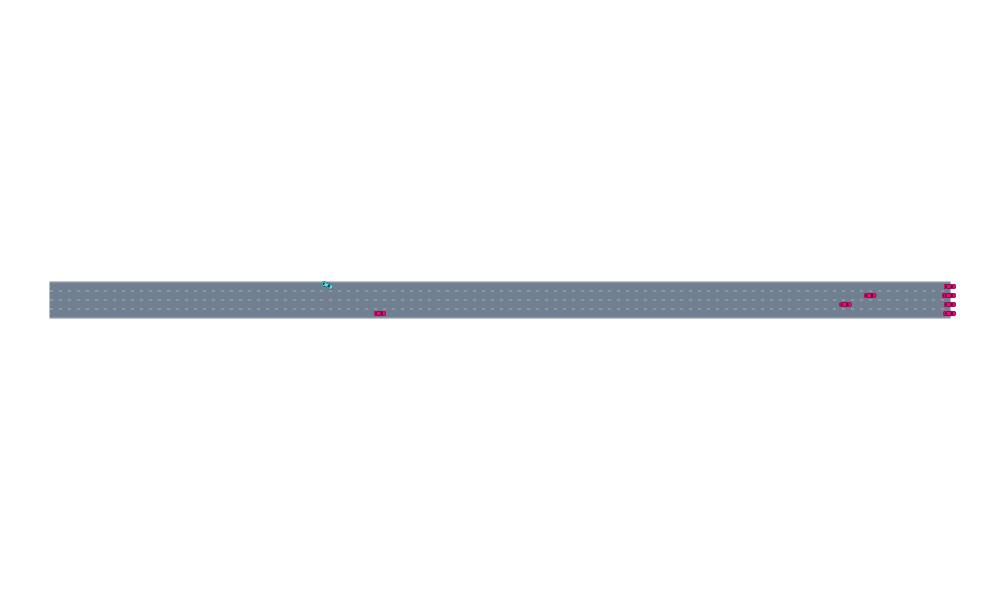

In [296]:
car_colors = Dict{Int,Colorant}(1 => colorant"0x52E3F6")
render(scenes[end], roadway, cam = FitToContentCamera(), car_colors=car_colors) # CarFollowCamera(1)

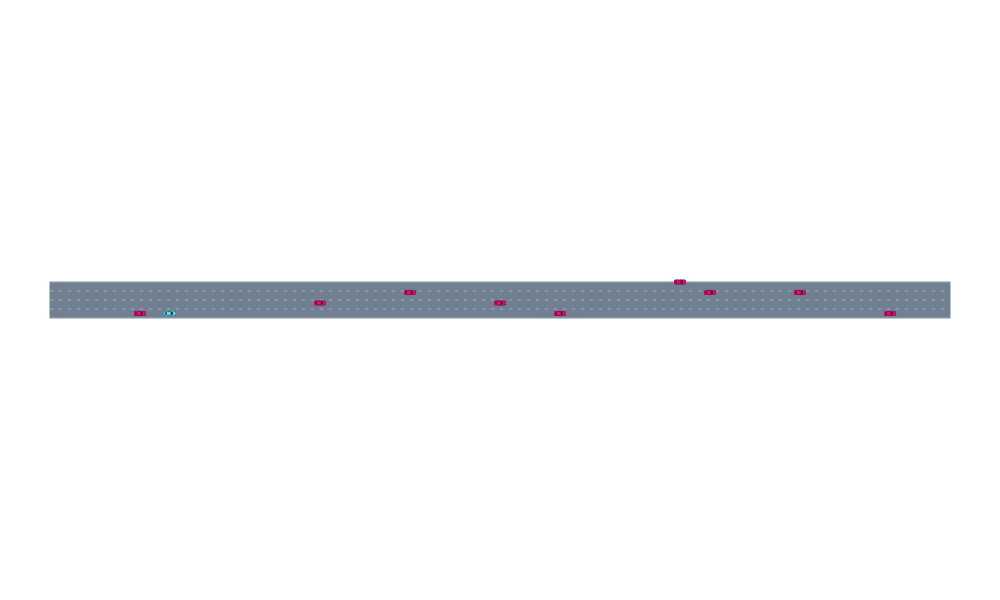

In [297]:
render(scenes[1], roadway, cam = FitToContentCamera(), car_colors=car_colors)

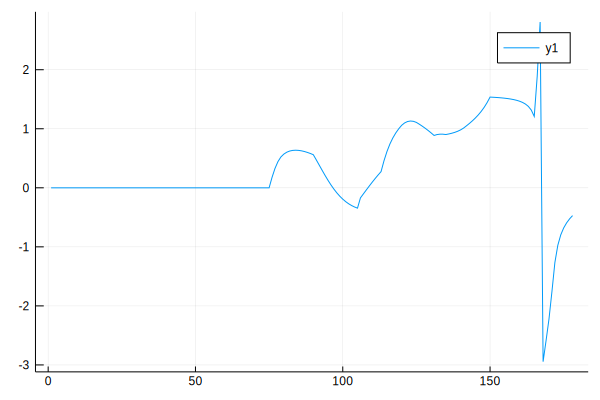

In [298]:
using Plots
plot(headings)

In [224]:
num_goal = 0
num_fail = 0
num_collisions = 0
num_timeouts = 0
nlanes = 4
ntrials = 100
vehicle_width = scenes[end][1].def.width
lane_break_distance = DEFAULT_LANE_WIDTH / 2 - vehicle_width / 2
for i = 1:ntrials
    roadway, policy, scenes = simulate_pomdp()
    if get_lane(roadway, scenes[end][1].state).tag.lane == nlanes && abs(scenes[end][1].state.posF.ϕ) < pi/6 && abs(scenes[end][1].state.posF.t) < lane_break_distance
        num_goal += 1
    else
        num_fail += 1
        if collision_checker(scenes[end], EGO_ID) 
            num_collisions += 1
        else
            num_timeouts += 1
        end
    end
end

"timeout" = "timeout"
r = -420141.2178900127
"timeout" = "timeout"
r = -575223.6905090899
"collision" = "collision"
r = -220037.92484282923
"finish line" = "finish line"
r = 1663.3109983980255
"timeout" = "timeout"
r = -420175.1542386811
"timeout" = "timeout"
r = -283142.54705922113
"finish line" = "finish line"
r = -386284.4029567705
"timeout" = "timeout"
r = -539441.3285576449
"collision" = "collision"
r = -105002.95700069061
"timeout" = "timeout"
r = -385131.35230920487
"timeout" = "timeout"
r = -354376.0128009607
"timeout" = "timeout"
r = -384019.54364355037
"finish line" = "finish line"
r = 1259.7719590193444
"timeout" = "timeout"
r = -605219.6912927601
"timeout" = "timeout"
r = -557025.2585399137
"timeout" = "timeout"
r = -319683.15054604923
"finish line" = "finish line"
r = 1254.9712620676228
"timeout" = "timeout"
r = -301893.59909592976
"timeout" = "timeout"
r = -479652.73834736703
"finish line" = "finish line"
r = 1254.742308179366
"finish line" = "finish line"
r = 1259.567979

In [225]:
@show num_goal
@show num_fail
@show num_collisions
@show num_timeouts

num_goal = 22
num_fail = 78
num_collisions = 14
num_timeouts = 64


64

In [ ]:
# d 20, c 5, i 500: 2-8
# d 50, c 5, i 500: 0-10
# d 20, c 10, i 500: 3-7
# d 20, c 15, i 500: 3-7
# d 20, c 10, i 750: 0-10

In [25]:
using D3Trees
mdp = laneChangeMDP()
state = initialstate(mdp, MersenneTwister(0))
solver = MCTSSolver(n_iterations=500, depth=20, exploration_constant=10.0)
planner = solve(solver, mdp)
D3Tree(policy, planner, init_expand=2)

MethodError: MethodError: no method matching D3Tree(::DPWPlanner{laneChangeMDP,Frame{Entity{VehicleState,VehicleDef,Int64}},Int64,MCTS.SolvedRolloutEstimator{RandomPolicy{MersenneTwister,laneChangeMDP,BeliefUpdaters.NothingUpdater},MersenneTwister},RandomActionGenerator{MersenneTwister},MersenneTwister}, ::MCTSPlanner{laneChangeMDP,Frame{Entity{VehicleState,VehicleDef,Int64}},Int64,MCTS.SolvedRolloutEstimator{RandomPolicy{MersenneTwister,laneChangeMDP,BeliefUpdaters.NothingUpdater},MersenneTwister},MersenneTwister}; init_expand=2)
Closest candidates are:
  D3Tree(::Any, ::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any, !Matched::Any) at /Users/williambrannon/.julia/packages/D3Trees/CDEyE/src/D3Trees.jl:20 got unsupported keyword argument "init_expand"
  D3Tree(!Matched::MCTSPlanner, ::Any; kwargs...) at /Users/williambrannon/.julia/packages/MCTS/iKnNr/src/visualization.jl:16
  D3Tree(::DPWPlanner; kwargs...) at /Users/williambrannon/.julia/packages/MCTS/iKnNr/src/visualization.jl:38
  ...

In [70]:
@show length(scenes)

length(scenes) = 199


199

In [82]:
@show scenes[1][2].state.v

((scenes[1])[2]).state.v = 6.9397749279404e-310


6.9397749279404e-310

In [83]:
using Reel

In [84]:
function animate_record(scenes::Vector{Scene},dt::Float64, roadway::Roadway{Float64}, car_colors=Dict{Int,Colorant}(1 => colorant"0x52E3F6"), cam=FitToContentCamera())
    duration =size(scenes)[1]*dt::Float64
    fps = Int(1/dt)
    function render_rec(t, dt)
        frame_index = Int(floor(t/dt)) + 1
        return render(scenes[frame_index], roadway, cam=cam, car_colors=car_colors)
    end
    return duration, fps, render_rec
end

animate_record (generic function with 3 methods)

In [280]:
duration, fps, render_hist = animate_record(scenes, 0.05, roadway)
film = roll(render_hist, fps = fps, duration = duration)
write("simulation.mp4", film)

"simulation.mp4"